In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp as exp
%matplotlib inline

In [2]:
# Plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# Set-up Plotly
tls.set_credentials_file(username="jclasul", api_key="MKXHNoKq9cRqNshsRQlh")
tls.set_config_file(sharing="public")

In [12]:
HR = pd.read_csv("HRIN.csv")

# Drop useless variables
# find way to automate without looking at plots
HR.drop(["EmployeeCount","Over18","StandardHours"], axis = 1, inplace=True)

# 35 variables for 1470 persons before drops
HR.shape

(1470, 32)

In [13]:
# List all variables and data types
HR.dtypes.value_counts()

int64     24
object     8
dtype: int64

In [14]:
# Dealing with CATEGORICAL variables
# # # # # # # # # # # #
# Method 1:
# One-Hot encoding
# # # # # # # # # # # #

recast = pd.get_dummies(HR, sparse=True)
recast_corr = pd.DataFrame.dropna(recast.corr(), axis=[0,1],how="all")

# # # # # # # # # # # #
# Method 2:
# Label Encoding
# # # # # # # # # # # #
#
# Convert all Object dtypes to Categorical

def TO_CAT(col):
    return col.astype("category").cat.codes
    
encoding = HR.apply(TO_CAT, axis=0)
encoding_corr = pd.DataFrame.dropna(encoding.corr(), axis=[0,1],how="all")

In [69]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=recast_corr.values.tolist(),
                   x=recast_corr.columns.tolist(),
                   y=recast_corr.columns.tolist())])

In [9]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=encoding_corr.values.tolist(),
                   x=encoding_corr.columns.tolist(),
                   y=encoding_corr.columns.tolist())])

In [15]:
# Plotting Function
# Using Encoded labels
#
# To Add: Category names !!
#
def GET_CAT(COLUMN):
    CCDict = {}
    if HR[COLUMN].dtype == 'O': 
        CCats = HR[COLUMN].astype("category").cat.categories.tolist()
        for i,CCat in enumerate(CCats):
            CCDictUpdate = {CCat: i}
            CCDict.update(CCDictUpdate)
        return CCDict
            

def MakeGraph(DATA,INPUT,RESPONSE="Attrition"):
    for VARIABLE in INPUT:
        if VARIABLE == RESPONSE:
            continue
            
        sns.set_style("whitegrid")
        sns.set_palette("muted")
        plt.figure(figsize=(12,5))
        plt.suptitle("{:s} and {:s} graphs".format(VARIABLE,RESPONSE), fontsize="x-large")

        p1 = plt.subplot(2,2,2)
        sns.boxplot(y=DATA[RESPONSE], x=DATA[VARIABLE], orient="h")
        plt.legend()

        p2 = plt.subplot(2,2,4, sharex=p1)
        if RESPONSE == "Attrition":
            sns.distplot(DATA.loc[DATA[RESPONSE] == 0][VARIABLE], label="Stayed")
            sns.distplot(DATA.loc[DATA[RESPONSE] == 1][VARIABLE], label="Left")               
        plt.ylabel("Probability Density")
        plt.legend()

        p3 = plt.subplot(1,2,1)
        sns.pointplot(x=DATA[RESPONSE],y=DATA[VARIABLE], capsize = 0.2)
        plt.show()
        print(GET_CAT(VARIABLE))       

In [16]:
DATA = encoding
INPUT = pd.DataFrame.select_dtypes(DATA, exclude=["object"]).columns
RESPONSE = "Attrition"

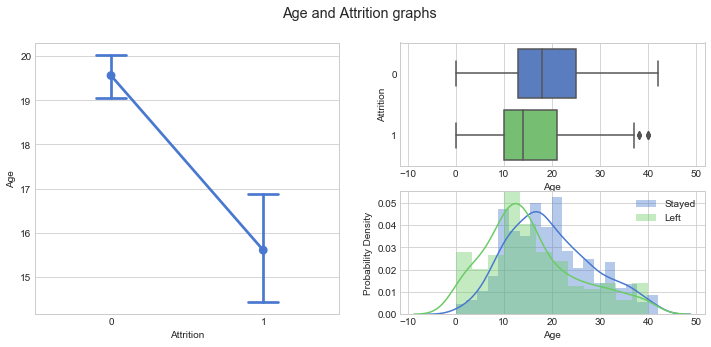

None


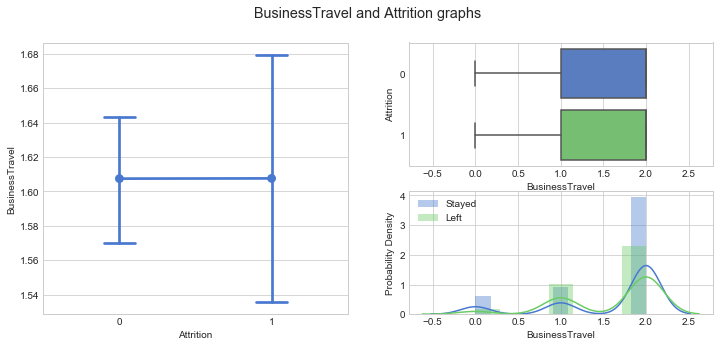

{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


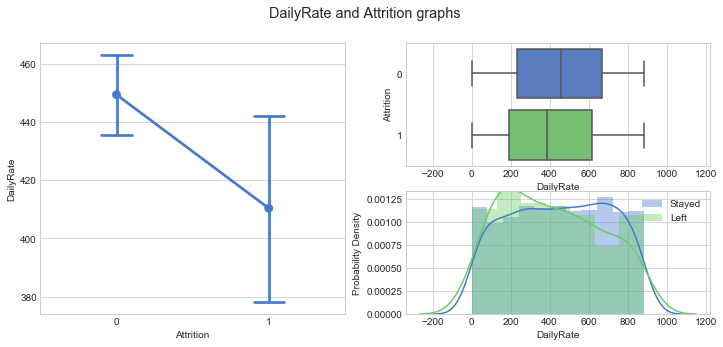

None


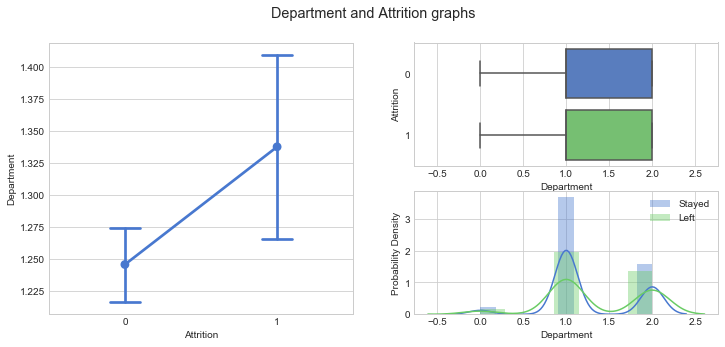

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


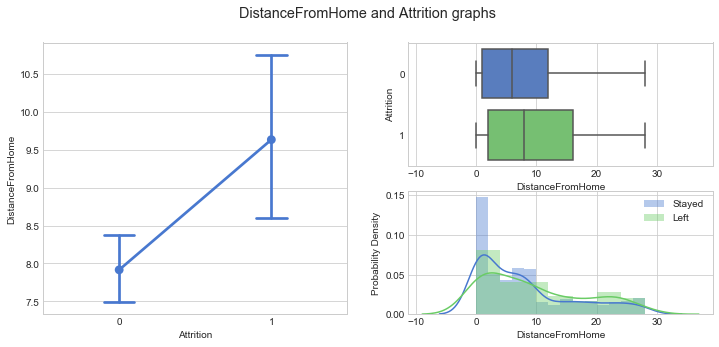

None


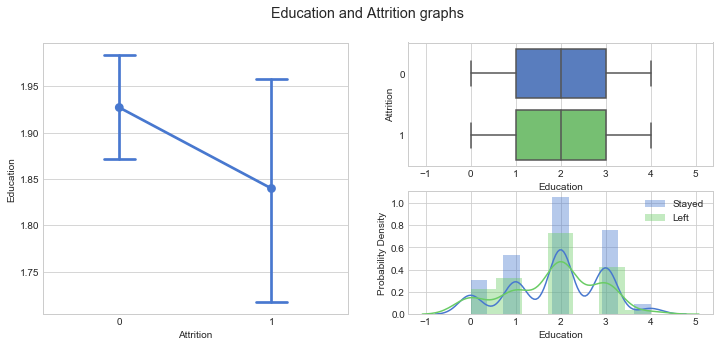

None


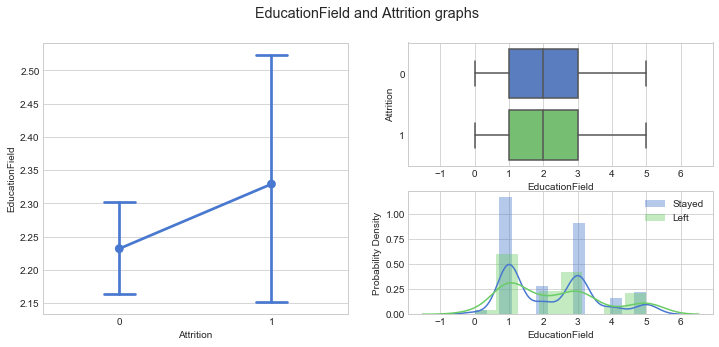

{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


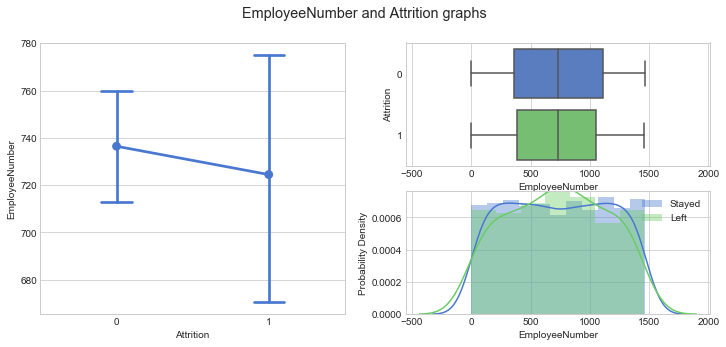

None


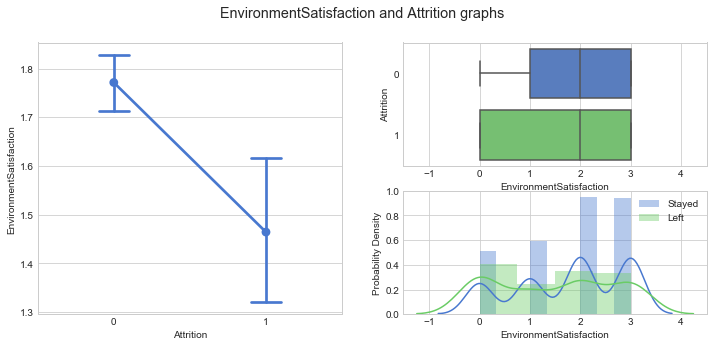

None


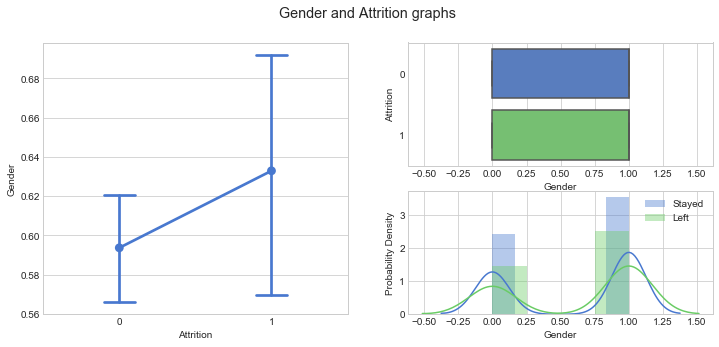

{'Female': 0, 'Male': 1}


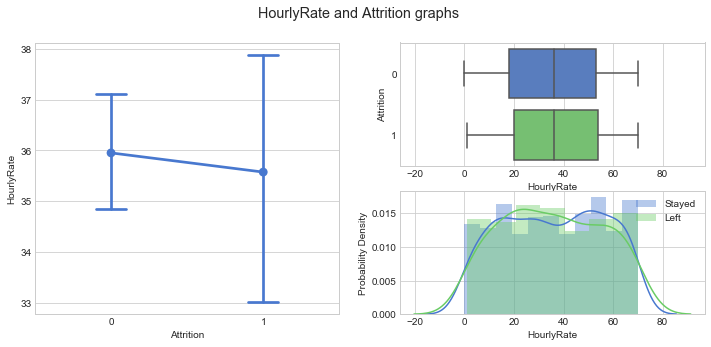

None


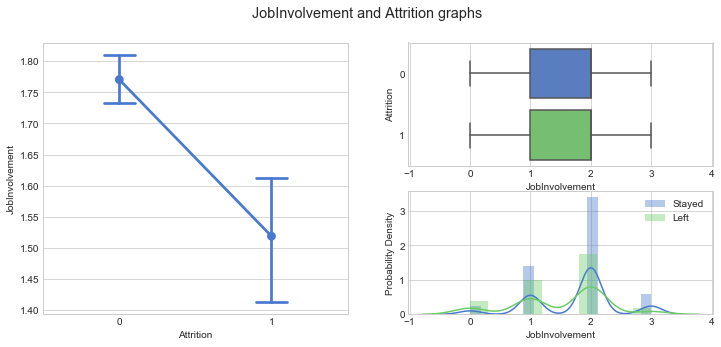

None


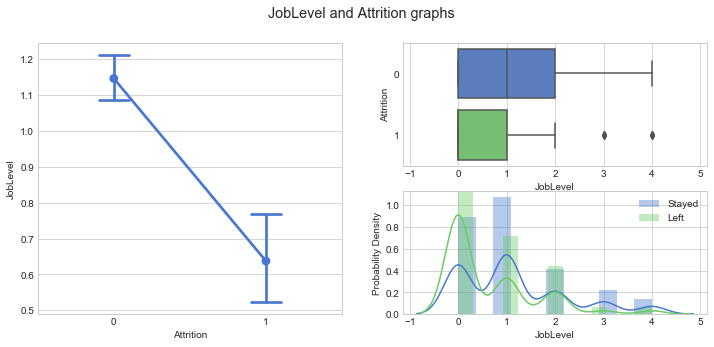

None


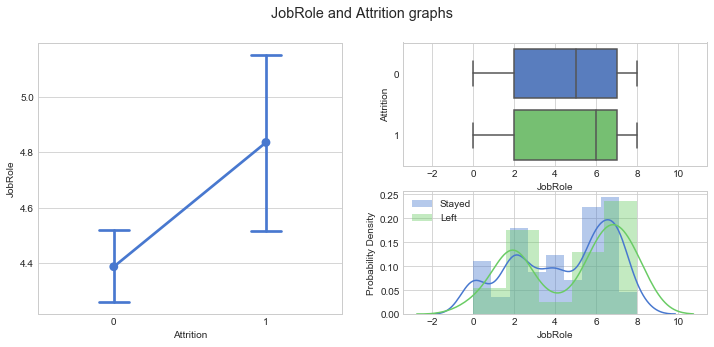

{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}


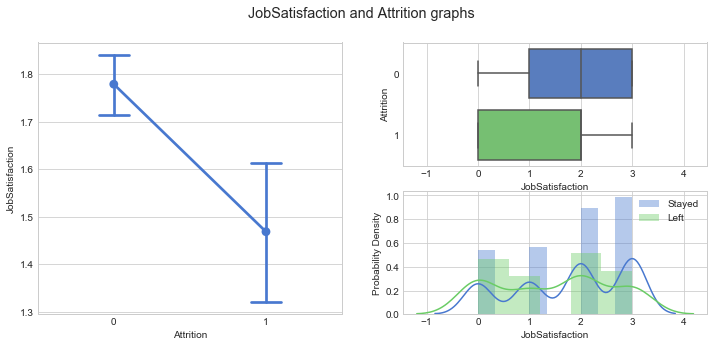

None


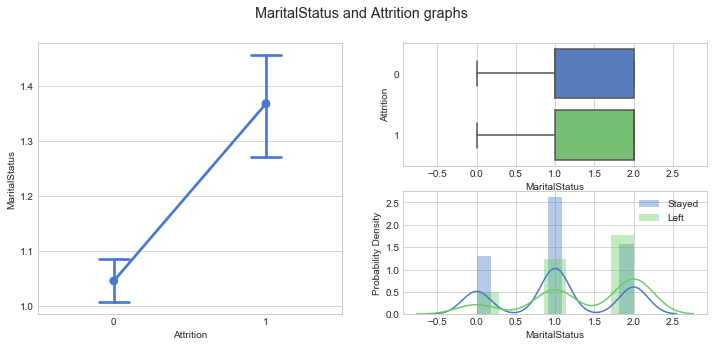

{'Divorced': 0, 'Married': 1, 'Single': 2}


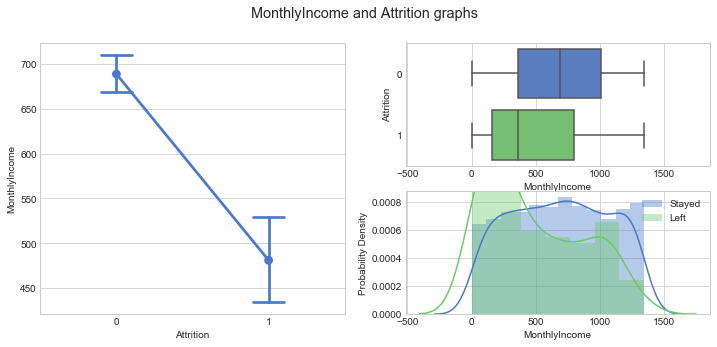

None


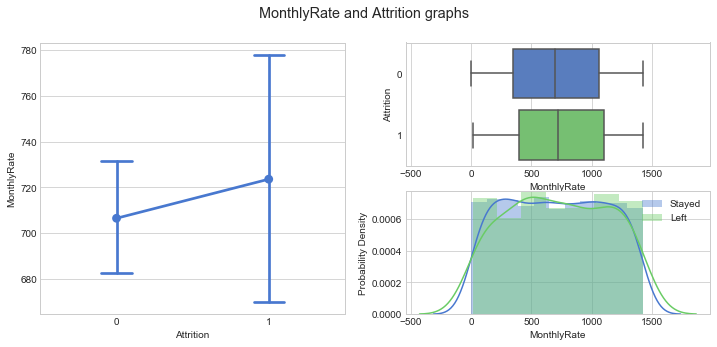

None


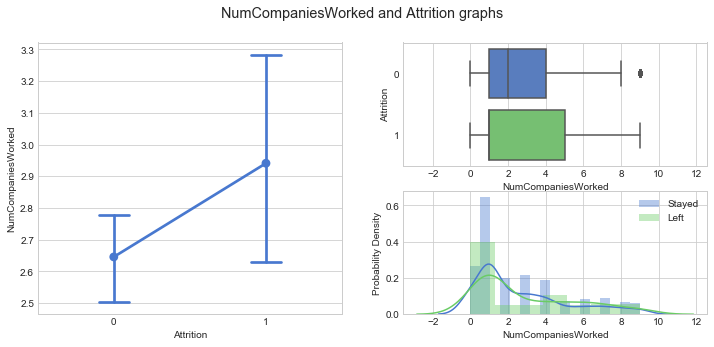

None


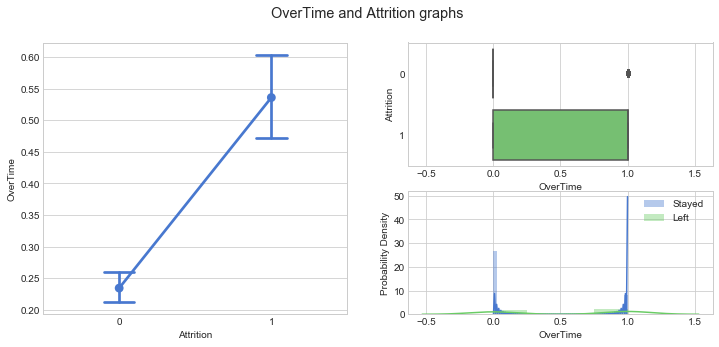

{'No': 0, 'Yes': 1}


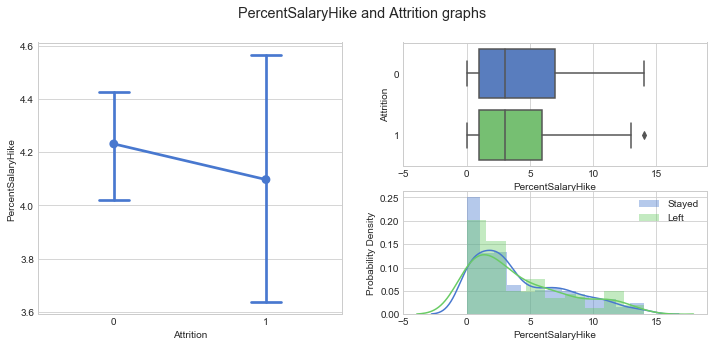

None


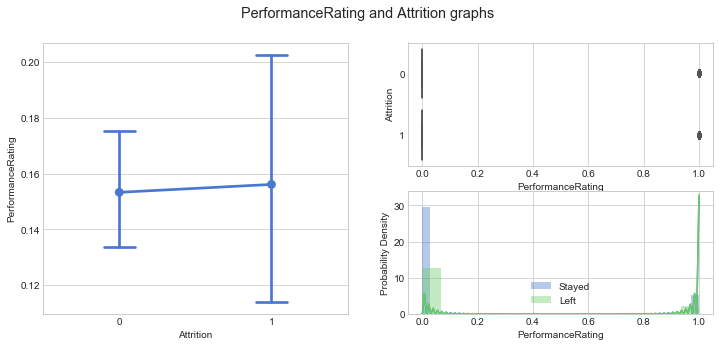

None


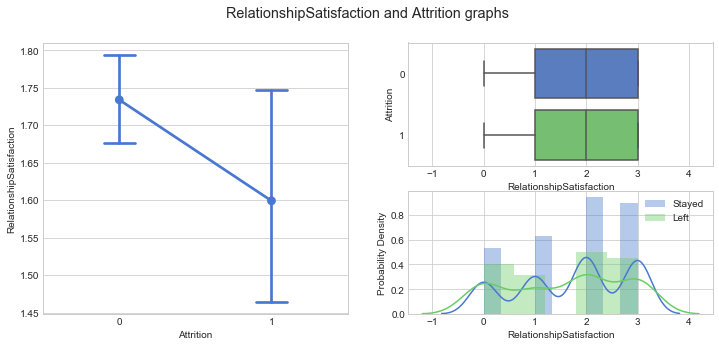

None


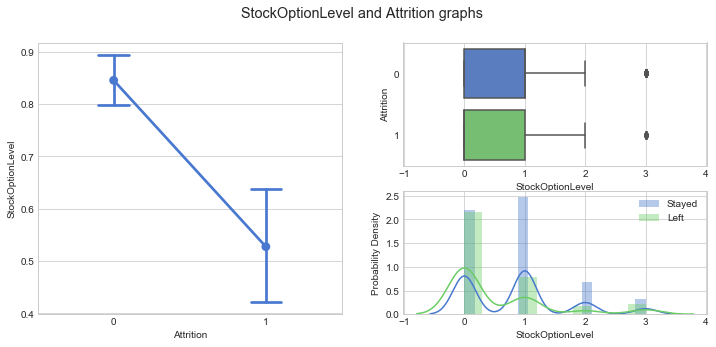

None


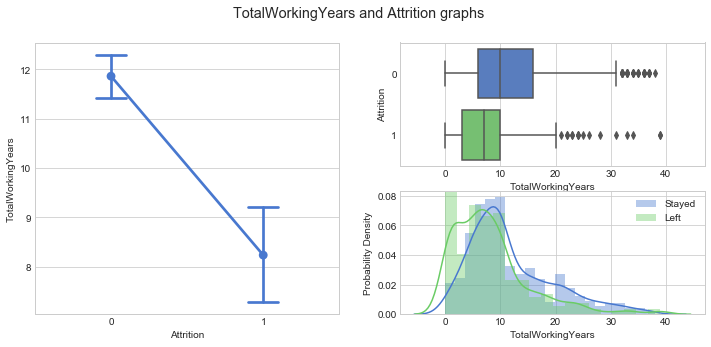

None


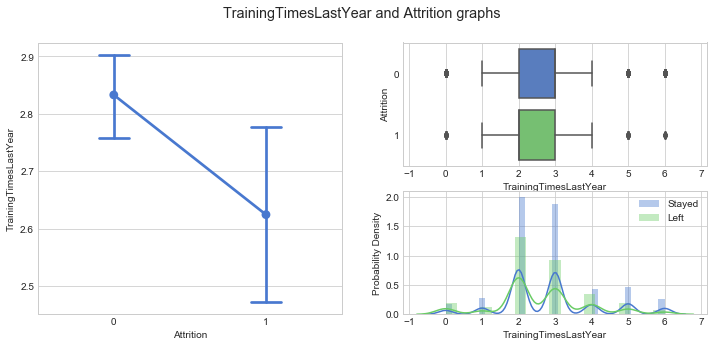

None


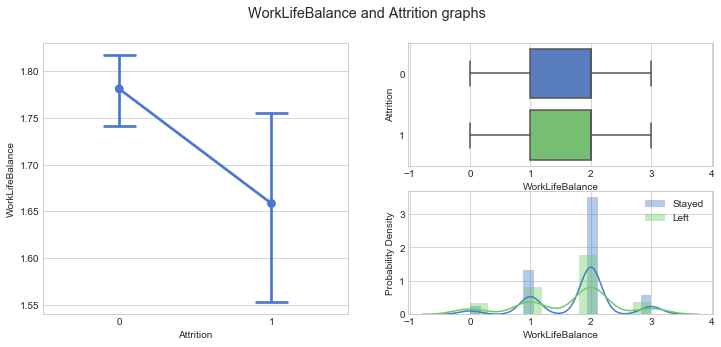

None


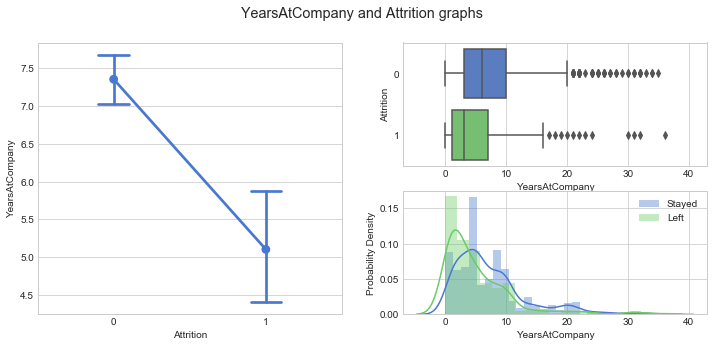

None


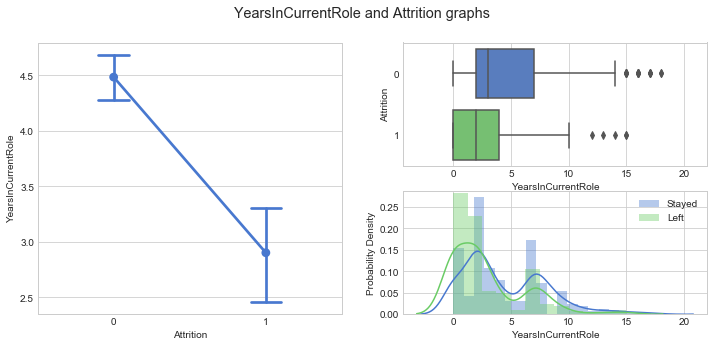

None


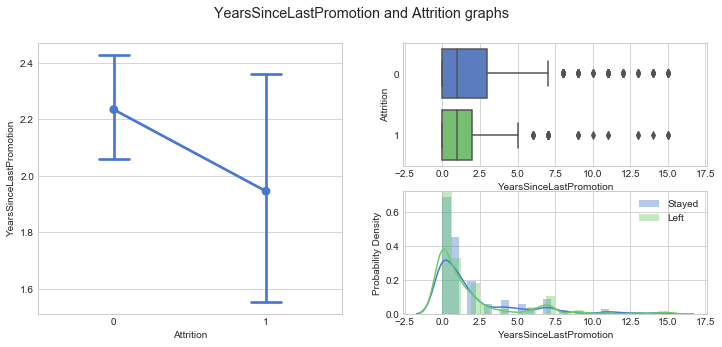

None


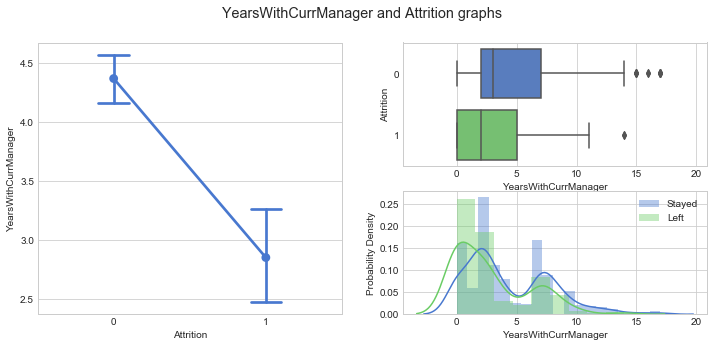

None


In [17]:
MakeGraph(DATA,INPUT,RESPONSE)

In [15]:
# START machine learning
# something
# something else
# finish

In [15]:
# SPLIT data


In [87]:
pd.DataFrame.select_dtypes(HR, exclude=["object"]).columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')